<a href="https://colab.research.google.com/github/Supreme-YS/data_analysis/blob/master/MLP_Classification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models   import Sequential
from tensorflow.keras.layers   import Activation, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

In [93]:
raw_data = load_breast_cancer()
type(raw_data)
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [94]:
# 학습 , 테스트 , shape

X_train, X_test, y_train, y_test = train_test_split(raw_data.data, raw_data.target, test_size=0.2, random_state=100)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [96]:
# 모델 만들기
model = Sequential()

model.add(Dense(30, activation='sigmoid', input_shape=(30,)))

model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.add(Dense(1)) # 값을 예측하는 것이기 때문에 1개의 출력값

In [97]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_92 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_93 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_94 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 11        
Total params: 1,471
Trainable params: 1,471
Non-trainable params: 0
_________________________________________________________________


In [98]:
# 모델 컴파일 정확도(accuracy), loss='binary_crossentropy
model.compile(loss = 'binary_crossentropy', 
             optimizer = SGD(learning_rate=0.01),
              metrics = ['accuracy'] )

In [ ]:
model.fit(X_train, y_train, batch_size=50, epochs=200, verbose = 1)

In [100]:
result = model.evaluate(X_test, y_test)
print('loss', result[0])
print('accuracy', result[1])

4/4 [==============================] - 0s 3ms/step - loss: 8.7949 - accuracy: 0.4298
loss 8.794926643371582
accuracy 0.429824560880661


Epoch 1/10
12/12 [==============================] - 0s 11ms/step - loss: 9.7678 - accuracy: 0.3668 - val_loss: 10.5539 - val_accuracy: 0.3158
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 9.7678 - accuracy: 0.3668 - val_loss: 10.5539 - val_accuracy: 0.3158
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 9.7678 - accuracy: 0.3668 - val_loss: 10.5539 - val_accuracy: 0.3158
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 9.7678 - accuracy: 0.3668 - val_loss: 10.5539 - val_accuracy: 0.3158
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 9.7678 - accuracy: 0.3668 - val_loss: 10.5539 - val_accuracy: 0.3158
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 9.7678 - accuracy: 0.3668 - val_loss: 10.5539 - val_accuracy: 0.3158
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 9.7678 - accuracy: 0.3668 - val_loss: 10.5539 - val_accuracy: 0.3158
Epoch 8/10
1

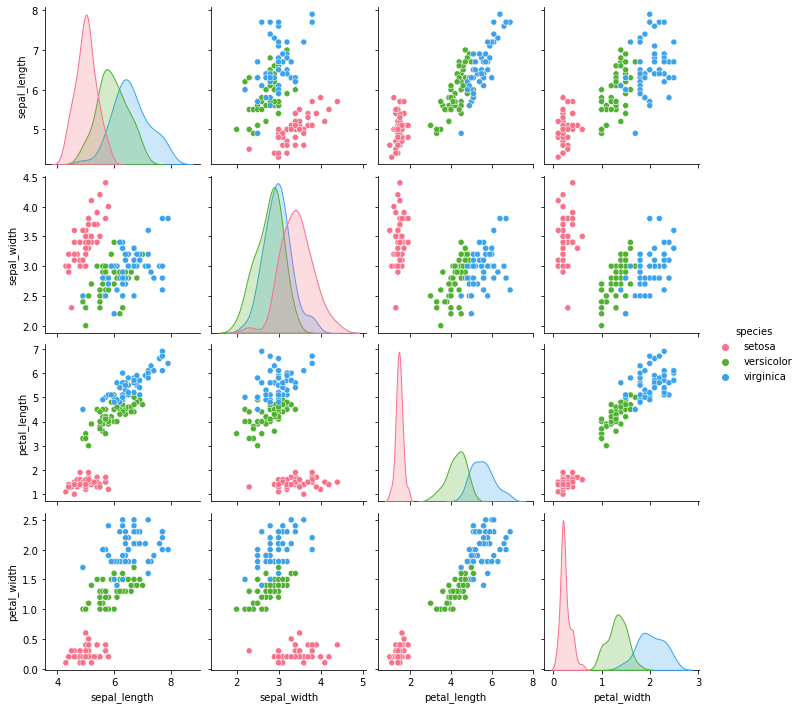

In [101]:
#  교차 검증으로 테스트
#  K-Fold 교차검증


def get_model() :
  model.add( Dense(30 , input_shape=(30 , )))
  model.add( Activation('sigmoid'))

  model.add( Dense(10 , activation='sigmoid'))
  model.add( Dense(10 , activation='sigmoid'))
  model.add( Dense(10 , activation='sigmoid'))

  model.add( Dense(1  , activation='sigmoid'))  
  return model 

fold = KFold(n_splits = 6 )

acc_list = []
for train_idx , val_idx in fold.split(X_train) :
  # print(train_idx , val_idx)
  x_train_fold , x_val_fold = X_train[train_idx] , X_train[val_idx]
  y_train_fold , y_val_fold = y_train[train_idx] , y_train[val_idx] 
  
  model = get_model()
  model.fit(x_train_fold , y_train_fold , epochs = 10 , validation_data = (x_val_fold, y_val_fold))
  

  _, acc = model.evaluate(X_test , y_test)
  acc_list.append(acc)

print(np.mean(acc_list))
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", palette="husl")
    
# for train_index, test_index in kfold.split(df):
#     label_train = df["label"].iloc[train_index]
#     label_test = df["label"].iloc[test_index]
#     print("교차검증 번호: {0}".format(n_iter))
#     print("학습 레이블 분포")
#     print(label_train.value_counts())
#     print("검증 레이블 분포")
#     print(label_test.value_counts())
#     print("")

In [102]:
# sns.load_datasets('iris')
# LabelEncoder
# train_test_split
# model activation=relu, output(sofrtmax)
# optimizer = Adam, loss = categorical_crossentropy , acc
# compile
# history = fit
# loss, val_loss, acc, val_acc 시각화

In [103]:
# type(iris)
# iris.head()
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  preprocessing.LabelEncoder()
encoder_y = encoder.fit_transform(y)
Y = pd.get_dummies(encoder_y).values
Y

In [105]:
X_train, y_train, X_test, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [106]:
model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 64)                320       
_________________________________________________________________
dense_127 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_128 (Dense)            (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [107]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

ValueError: ignored

In [ ]:
history.history.keys()

In [90]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

NameError: ignored

<Figure size 864x576 with 0 Axes>

In [109]:
result = model.evaluate(X_test , y_test) 
print(model.metrics_names)
print('loss' , result[0])
print('acc' , result[1])

ValueError: ignored

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape,  y_test.shape


((120, 4), (30, 4), (120, 3), (30, 3))